# Milestone 2

In [6]:
import Cosserat
from Cosserat import cosserat_rod
import numpy as np
from matplotlib import pyplot as plt

# for updates
import importlib
importlib.reload(Cosserat)

'''Define rod'''
# 2 element rod
tot_length = 3.0
n_elements = 2
n_nodes = n_elements + 1
 
r_o = np.zeros((3, n_nodes))
r_o[2] = np.arange(0.0, (tot_length+1E-14)*np.cos(np.pi/4), (tot_length/n_elements)*np.cos(np.pi/4))
r_o[0] = np.arange(0.0, (tot_length+1E-14)*np.sin(np.pi/4), (tot_length/n_elements)*np.sin(np.pi/4))
r_o[0, int(n_nodes/2.0):] = -r_o[0, int(n_nodes/2.0):] + tot_length*np.cos(np.pi/4)

Q_o = np.zeros((3, 3, n_elements))
L = r_o[:, 1:] - r_o[:, :-1]
L_norm = np.linalg.norm(L, axis=0, keepdims=True)
Q_o[2] = L/L_norm
Q_o[1] = [[0]*n_elements, [1]*n_elements, [0]*n_elements]
Q_o[0] = np.cross(Q_o[1], Q_o[2], axis = 0)

v_o = np.zeros((3, n_nodes))
w_o = np.zeros((3, n_elements))
rad = 0.25
rho = 5E3
E = 1E6
G = 1E4
lock_e = False
damping = False

ext_force = np.zeros((3, n_nodes))
ext_couples = np.zeros((3, n_elements))
Milestone = 2
v_case = cosserat_rod(r_o, Q_o, v_o, w_o, n_elements, rad, rho, E, G, lock_e, damping, Milestone, ext_force, ext_couples)

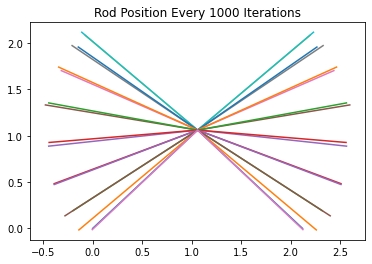

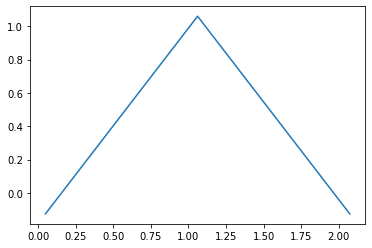

In [7]:
'''Control simulation'''
t_total = 5
dt = 3E-4
n_iterations = int(np.ceil(t_total/dt))
r_history = np.zeros((3, n_nodes, n_iterations))
w_history = np.zeros((3, n_elements, n_iterations))


for time_step in range(n_iterations):
    v_case.step(dt)
    r,w = v_case.get_state(['r', 'w'])
    r_history[:, :, time_step] = r
    w_history[:, :, time_step] = w
    
time_history = np.arange(0, t_total, dt)
for it in range(n_iterations):
    if it % 1000 == 0:
        plt.plot(r_history[2, :, it], r_history[0, :, it])
        
plt.title("Rod Position Every 1000 Iterations")
        
plt.figure()
plt.plot(r[2], r[0])

In [64]:
# Rotation tests
print(Q_o)
Q_n = v_case.rotate_rodrigues(Q_o, [0.38, 0.38], [[1, 1], [0, 0], [0, 0]])
print(Q_n)
v_case.inverse_rotate(Q_o, Q_n)

[[[1. 1.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [1. 1.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [1. 1.]]]
[[[ 1.          1.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 [[ 0.          0.        ]
  [ 0.92866464  0.92866464]
  [ 0.37092047  0.37092047]]

 [[ 0.          0.        ]
  [-0.37092047 -0.37092047]
  [ 0.92866464  0.92866464]]]


array([[-0.38, -0.38],
       [ 0.  ,  0.  ],
       [-0.  , -0.  ]])